In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import os
import random

In [2]:
os.chdir('C:/Users/Evangelina Garza/Documents/CIMAT/MCE_2Semestre/Ciencia de Datos')

In [3]:
sns.set()
%matplotlib inline

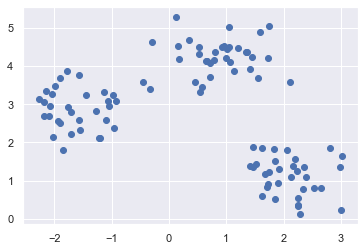

In [48]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=100, centers=3,
                       cluster_std=0.50, random_state=0)
plt.scatter(X[:, 0], X[:, 1])

In [49]:
def my_kmeans(z,kk):
    indices = list(range(0,z.shape[0]))
    ix = random.sample(indices,k=kk)
    centroides=np.zeros((kk,z.shape[1]))
    d=np.zeros((z.shape[0],kk))
    
    for i in range(kk):
            j=ix[i]
            centroides[i,]=z[j,]
    
    temp=0
    c = []
    new_centroides=centroides
    flag=0
    
    while flag == 0:
        for p in range(z.shape[0]):
            for l in range(kk):
                d[p,l]=sum(((z[p,:]-new_centroides[l,:])**2))
    
        for a in range(z.shape[0]):
            lista = d[a,:]
            lista = lista.tolist()
            m=lista.index(min(lista))
            c.append(m)
    
        cont=np.zeros((kk,z.shape[1]))
        for k in range(kk):
            for j in range(z.shape[0]):
                if c[j] == k:
                    new_centroides[k,]=new_centroides[k,]+z[j,]
                    cont[k,]=cont[k,]+1
        
        new_centroides = new_centroides/cont
        
        if temp==0:
            ant=c
            flag=0
        else:
            if ant == c:
                flag=1
            else:
                ant=c
                flag=0
                
        temp=temp+1
        c=[]
    
    return ant,new_centroides

In [50]:
clasi,centros = my_kmeans(X,3)

In [51]:
clasi=np.array(clasi)
clasi

array([0, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1, 0, 0, 2,
       2, 2, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0,
       2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2,
       0, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1])

In [52]:
y_true

array([1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2])

In [53]:
X_new=np.column_stack((X, clasi))
X_new

array([[ 2.34356293,  0.79351428,  0.        ],
       [ 0.5285368 ,  4.49723858,  2.        ],
       [ 2.52889351,  0.82015861,  0.        ],
       [ 0.16932115,  4.19741719,  2.        ],
       [ 0.4519936 ,  3.59377836,  2.        ],
       [ 0.802314  ,  4.38196181,  2.        ],
       [-2.10063834,  2.69897224,  1.        ],
       [-1.05219361,  2.96165788,  1.        ],
       [ 2.3914149 ,  1.10139458,  0.        ],
       [ 0.65910903,  4.12241674,  2.        ],
       [ 1.34081536,  4.36827878,  2.        ],
       [ 1.59141542,  4.90497725,  2.        ],
       [ 2.28809874,  0.12954182,  0.        ],
       [ 1.74265969,  5.03846671,  2.        ],
       [-1.89928142,  2.50466299,  1.        ],
       [ 2.989047  ,  1.35068599,  0.        ],
       [-1.57613028,  2.58614312,  1.        ],
       [ 0.56969694,  3.44064603,  2.        ],
       [-1.56102482,  3.77455362,  1.        ],
       [-2.07909568,  2.9439648 ,  1.        ],
       [-1.84871321,  1.80618069,  1.   

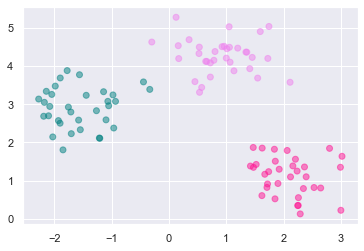

In [54]:
c_map = {0: 'deeppink', 1: 'teal', 2: 'violet'}

plt.scatter(X_new[:,0], X_new[:,1], c=[c_map[_] for _ in X_new[:,2]], alpha=0.5)
plt.show()

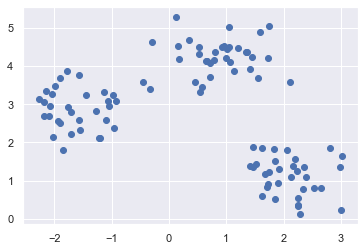

In [55]:
X2, y2_true = make_blobs(n_samples=100, centers=3,
                       cluster_std=0.50, random_state=0)

plt.scatter(X2[:, 0], X2[:, 1])

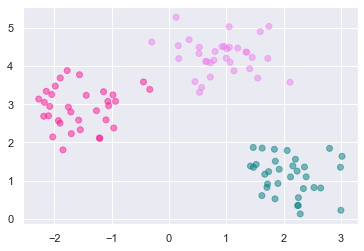

In [56]:
clasi2,centros2 = my_kmeans(X2,3)
clasi=np.array(clasi)
X2_new=np.column_stack((X2, clasi2))
plt.scatter(X2_new[:,0], X2_new[:,1], c=[c_map[_] for _ in X2_new[:,2]], alpha=0.5)
plt.show()

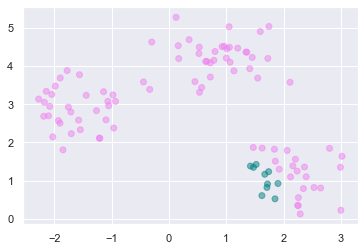

In [64]:
clasikk,centroskk = my_kernel_kmeans(X2,3)
clasikk=np.array(clasikk)
X2k_new=np.column_stack((X2, clasikk))
plt.scatter(X2k_new[:,0], X2k_new[:,1], c=[c_map[_] for _ in X2k_new[:,2]], alpha=0.5)
plt.show()

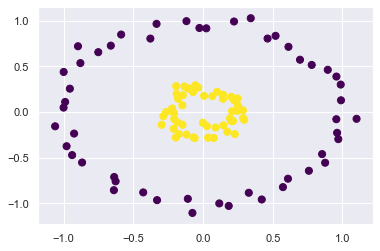

In [25]:
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_circles,make_moons
X_c,y_c = make_circles(100, factor=0.25, noise=0.05) 
plt.scatter(X_c[:,0],X_c[:,1], c=y_c, s=50, cmap='viridis')
plt.show()

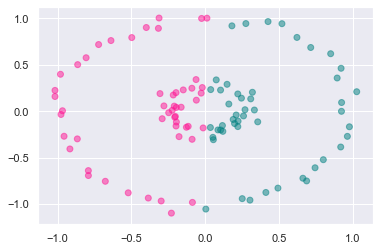

In [20]:
clasi3,centros3 = my_kmeans(X_c,2)
clasi3=np.array(clasi3)
X3_new=np.column_stack((X_c, clasi3))

plt.scatter(X3_new[:,0], X3_new[:,1], c=[c_map[_] for _ in X3_new[:,2]], alpha=0.5)
plt.show()

In [21]:
X_c.shape

(100, 2)

In [22]:
def my_kernel_kmeans(z,kk):
    indices = list(range(0,z.shape[0]))
    ix = random.sample(indices,k=kk)
    centroides=np.zeros((kk,z.shape[1]))
    d=np.zeros((z.shape[0],kk))
    
    nn=z.shape[0]/kk
    
    for i in range(kk):
            j=ix[i]
            centroides[i,]=z[j,]
    
    temp=0
    c = []
    new_centroides=centroides
    flag=0
    
    while flag == 0:
        for p in range(z.shape[0]):
            z1=z[p,0]**2
            z2=z[p,1]**2
            z3=z[1,1]*z[1,0]*(2**(0.5))
            zz=[z1,z2,z3]
            for l in range(kk):
                c1=new_centroides[l,0]**2
                c2=new_centroides[l,1]**2
                c3=(2**(0.5))*new_centroides[l,0]*new_centroides[l,1]
                n_c=[c1,c2,c3]
                d[p,l]=((z1-c1)+(z2-c2)+(z3-c3))**2
    
        for a in range(z.shape[0]):
            lista = d[a,:]
            lista = lista.tolist()
            m=lista.index(min(lista))
            c.append(m)
    
        cont=np.ones((kk,z.shape[1]))
        for k in range(kk):
            for j in range(z.shape[0]):
                if c[j] == k:
                    new_centroides[k,]=new_centroides[k,]+z[j,]
                    cont[k,]=cont[k,]+1
        
        new_centroides=new_centroides/cont
        
        if temp==0:
            ant=c
            flag=0
        else:
            if ant == c:
                flag=1
            else:
                ant=c
                flag=0
                
        temp=temp+1
        c=[]
    
    return ant,new_centroides

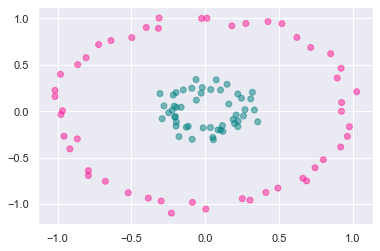

In [23]:
clasi4,centros4 = my_kernel_kmeans(X_c,2)
clasi4=np.array(clasi4)
X4_new=np.column_stack((X_c, clasi4))

plt.scatter(X4_new[:,0], X4_new[:,1], c=[c_map[_] for _ in X4_new[:,2]], alpha=0.5)
plt.show()

<Figure size 432x288 with 0 Axes>

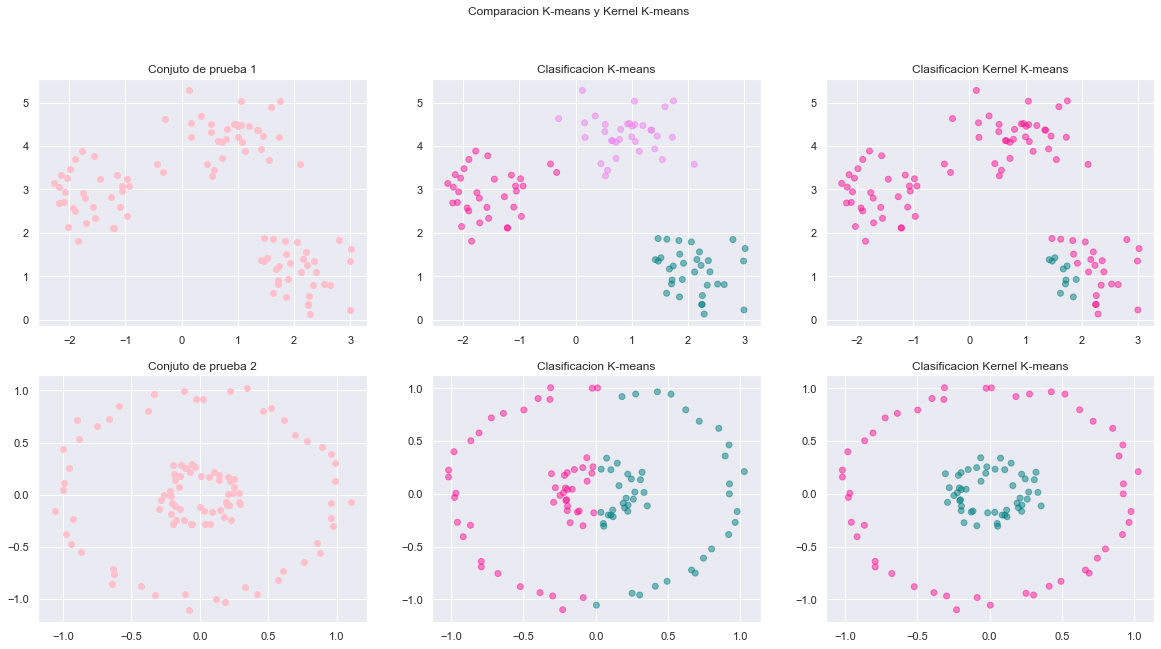

In [59]:
fig = plt.figure() 
fig, axes = plt.subplots(nrows = 2, ncols = 3,figsize=(20,10))

fig.suptitle('Comparacion K-means y Kernel K-means')
axes[0][0].scatter(X2[:, 0], X2[:, 1],c='pink')
axes[0][0].title.set_text('Conjuto de prueba 1')
axes[0][1].scatter(X2_new[:,0], X2_new[:,1], c=[c_map[_] for _ in X2_new[:,2]], alpha=0.5)
axes[0][1].title.set_text('Clasificacion K-means')
axes[0][2].scatter(X2k_new[:,0], X2k_new[:,1], c=[c_map[_] for _ in X2k_new[:,2]], alpha=0.5)
axes[0][2].title.set_text('Clasificacion Kernel K-means')

axes[1][0].scatter(X_c[:,0],X_c[:,1], c='pink')
axes[1][0].title.set_text('Conjuto de prueba 2')
axes[1][1].scatter(X3_new[:,0], X3_new[:,1], c=[c_map[_] for _ in X3_new[:,2]], alpha=0.5)
axes[1][1].title.set_text('Clasificacion K-means')
axes[1][2].scatter(X4_new[:,0], X4_new[:,1], c=[c_map[_] for _ in X4_new[:,2]], alpha=0.5)
axes[1][2].title.set_text('Clasificacion Kernel K-means')